# Momentum

Momentum optimizer를 썼을 때 weight, velocity, cost의 변화를 시각적으로 살펴보자.

## 1. Prepare data

TV 광고에 따른 매출 변화 데이터

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('advertisement.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
X = data.loc[:, 'TV'].values
y = data.loc[:, 'Sales'].values

In [4]:
print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

X shape: (200,)
y shape: (200,)


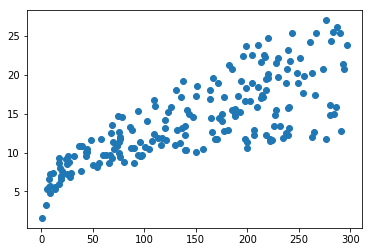

In [5]:
plt.scatter(X, y)
plt.show()
plt.close()

## 2. Loss shape : convex

- `advertisement.csv` 데이터에서 TV 광고 feature 하나만 사용
- 모델은 `f(x) = w*X + b` 형태로 사용
- w와 b에 따른 loss의 변화를 그래프로 나타내면 아래와 같다. 둘 모두 convex 형태다.

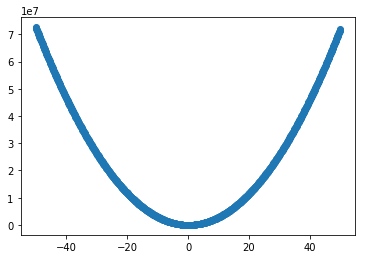

In [6]:
w_costs = []

for w in np.arange(-50, 50, 0.1):
    cost = np.sum(np.square(w * X - y)) / len(X)
    w_costs.append(cost)

plt.scatter(np.arange(-50, 50, 0.1), w_costs)
plt.show()
plt.close()

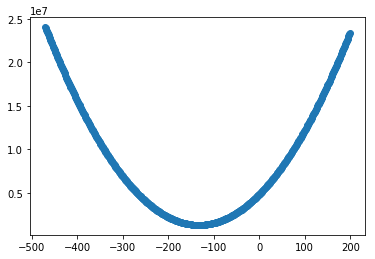

In [7]:
b_costs = []
start = -470
end = 200
for b in np.arange(start, end, 1):
    cost = np.sum(np.square(X + b - y))
    b_costs.append(cost)

plt.scatter(np.arange(start, end, 1), b_costs)
plt.show()
plt.close()

## 3. Training

In [8]:
# Global variable which also includes X and y.
beta = 0.9 # friction
eta = 0.001 # learning rate

initial_w = 43.5 # random initialization
weights = [initial_w]
velocities = [0] # initialized to 0
derivatives = []
costs = []

### 3.1 Momentum optimizer

$$
m_t = \beta m_{t-1} + \eta d \\
\theta_t = \theta_{t-1} - m_t
$$

- $m_t$ : t 시점의 velocity
- $\beta$ : friction(마찰)
- $\eta$ : learning rate
- $\theta_t$ : t 시점의 weight vector

In [9]:
def get_next_m(m, dw):
    return beta * m + eta * dw

def get_next_w(w, m):
    return w - m

### 3.2 Training

In [10]:
def propagate(w):
    cost = np.sum(np.square(w * X - y)) / len(X)
    costs.append(cost)
    return cost

def get_derivative(w):
    dw = np.dot(y - w*X, X) / len(X)
    derivatives.append(dw)
    return dw

def back_propagate(w):
    dw = get_derivative(w)
    
    next_m = get_next_m(velocities[i], dw)
    velocities.append(next_m)
    
    next_w = get_next_w(w, next_m)
    weights.append(next_w)

In [11]:
for i in range(100):
    # Forward propagate
    cost = propagate(weights[i])
    costs.append(cost)
    
    # Backword propagate
    back_propagate(weights[i])

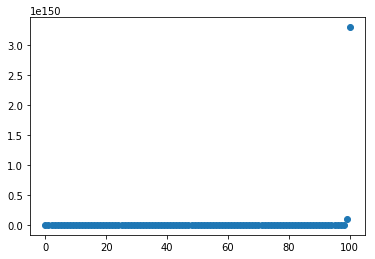

In [12]:
plt.scatter(range(101), weights)
plt.show()
plt.close()

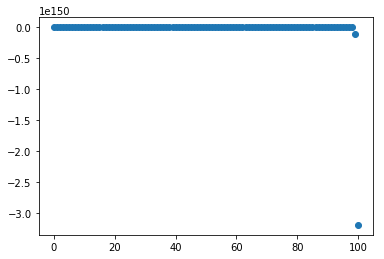

In [13]:
plt.scatter(range(101), velocities)
plt.show()
plt.close()

## 4. Simple example

### 4.1 Simple loss

In [14]:
theta = np.arange(-10, 10, 0.01)

In [15]:
def get_loss(x):
    return max(-x, x)

In [16]:
loss = []
for t in theta:
    loss.append(get_loss(t))

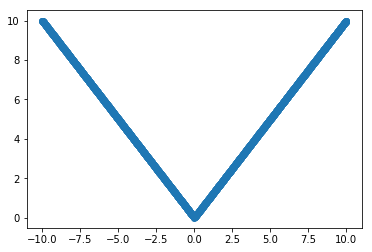

In [17]:
plt.scatter(theta, loss)
plt.show()
plt.close()

### 4.2 Velocity and theta

In [18]:
beta = 0.9 # friction
eta = 0.01 # learning rate
d = 1 # Assume theta is initialized to any positive value
m = 0
t = 0
thetas = [8.5]
velocities = [0]

In [19]:
def get_next_veloicty(m):
    return beta * m + eta * d

In [20]:
def get_next_theta(theta, m):
    return theta - m

In [21]:
for i in range(50):
    next_v = get_next_veloicty(velocities[i])
    velocities.append(next_v)
    next_t = get_next_theta(thetas[i], next_v)
    thetas.append(next_t)

현재 기울기를 1로 고정해놨기 때문에 계속 theta 값은 줄어든다. 그래프에서 보면 점점 빠르게 줄어드는 것을 볼 수 있다.

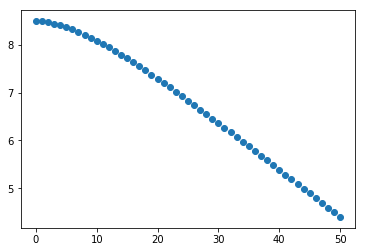

In [22]:
plt.scatter(range(51), thetas)
plt.show()
plt.close()

m 값, 즉 velocity는 계속 증가하긴 하는데 결국 terminal velocity 값이 존재한다.

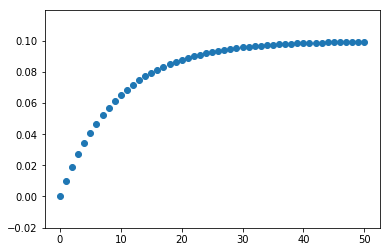

In [23]:
plt.scatter(range(51), velocities)
plt.show()
plt.close()